A study shows that a fake tweet on Twitter spreads six times faster than the real one. Thus, it becomes necessary to find whether a piece of news is true or fake whenever we read any information on the web.

As humans, when we read an article, we could somehow understand its context by interpreting its words. Given today’s volume of news, it is possible to teach computers how to read and understand the difference between real and fake news using NLP techniques. All you need here are the appropriate Machine Learning algorithms and a dataset.

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/train.csv")

In [ ]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


Having downloaded and read the dataset, we now have to check and classify its features (or attributes), this step generally depends on what the dataset contains and what we are about to analyze. Thus, in this classifier model, we’ll be taking the “Id”, “Title” and “Author” columns as Independent features and the “Label” column as a dependent feature.

In [ ]:
# Get the independent features
X= df.drop('label' ,axis=1)
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [ ]:
# Get dependent features
y=df['label']
y.head(10)

0    1
1    0
2    1
3    1
4    1
5    0
6    1
7    0
8    0
9    0
Name: label, dtype: int64

In [ ]:
df.shape

(20800, 5)

The dataset is checked for any missing values and those are dropped.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
df=df.dropna()
df.head(20)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


Now we’ll create a copy of this dataset and also reset its index values.

In [ ]:
messages=df.copy()
messages.reset_index(inplace=True)
messages.head(20)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
messages['title'][5]

'Jackie Mason: Hollywood Would Love Trump if He Bombed North Korea over Lack of Trans Bathrooms (Exclusive Video) - Breitbart'

This part of the code is for Stopword removal and Stemming. Here, the corpus is an array in which we have appended all the titles of the news.

In [ ]:
!pip install nltk
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
  review=re.sub('[^a-zA-z]' ,' ', messages['title'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review) # review name ke array mein jo words honge sab ko by space join kerdega
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus[4]

'iranian woman jail fiction unpublish stori woman stone death adulteri'

Applying count vectorizer (also known as the “Bag of Words”). Maximum features passed here are 5000.



In [ ]:
#Applying countvectorizer
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()
y=messages['label']

In [ ]:
X.shape

(18285, 5000)

Dataset is now split into train and test. The first 20 features are displayed here.

In [ ]:
#Divide the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)
cv.get_feature_names()[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

We’ll now get the parameters as the next step.

In [ ]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [ ]:
# The array is converted into dataframe.
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,abstain,absurd,abus,abus new,abus new york,academi,accept,access,access pipelin,access pipelin protest,accid,accident,accord,account,accus,achiev,acknowledg,acknowledg emf,acknowledg emf damag,acquit,acquitt,across,act,act like,act new,act new york,action,activ,activist,actor,...,xi,xi jinp,yahoo,yale,ye,year,year ago,year breitbart,year eve,year later,year new,year new york,year old,year old girl,yemen,yet,yet anoth,yiannopoulo,yield,york,york citi,york new,york new york,york time,yorker,young,young peopl,youth,youtub,zealand,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using the matplotlib function, lets plot a confusion matrix. This part of the code and the plot_confusion_matrix function will be used in all the upcoming algorithms for its training and accuracy prediction purpose.

In [ ]:
# This function prints and plots the confusion matrix.
#  Normalization can be applied by setting `normalize=True`
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive Bayes Algorithm

This algorithm considers the integer feature counts where it represents how often or how many times a specific word appears. It is much suitable for the classification of discrete features. i.e. word counts for classifying a text. The Prediction Accuracy we’ve got here is 90%.



Accuracy is:0.902 
Confusion matrix, without normalization


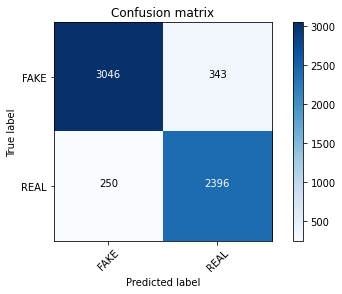

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
from sklearn import metrics
import numpy as np
import itertools # Itertools is a module in python, it is used to iterate over data structures that can be stepped over using a for-loop. Such data structures are also known as 
# iterables. This module incorporates functions that utilize computational resources efficiently.
classifier.fit(X_train,y_train) # fit means model ko train kerna
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print("Accuracy is:%0.3f " %score)
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [ ]:
score=metrics.accuracy_score(y_test,pred)
score

0.9017398508699255

In [ ]:
y_train.shape
pred

array([1, 1, 1, ..., 0, 0, 1])

# Passive Aggressive Classifier Algorithm

The PAC algorithm responds aggressively to incorrect predictions and remains passive for the correct predictions. By using this algorithm, the accuracy is 91.8%.



Accuracy: 0.918
Confusion matrix, without normalization


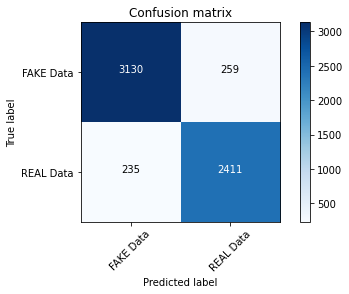

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)
linear_clf.fit(X_train,y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test,pred)
print("Accuracy: %0.3f"%score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes = ['FAKE Data','REAL Data'])

# Multinomial Classifier with Hyperparameter (alpha)

It’s none other than the Multinomial Naive Bayes algorithm we trained earlier but here we’ll be adding a hyperparameter for it and for each alpha value, the corresponding scores are calculated. At alpha = 0.3, the score seems to be maximum.

The more negative the coefficient value, the word is used in fake news!

In [ ]:
classifier=MultinomialNB(alpha=0.1)

In [ ]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Alpha: 0.0, Score : 0.8906379453189727
Alpha: 0.1, Score : 0.9020712510356255
Alpha: 0.2, Score : 0.9022369511184756
Alpha: 0.30000000000000004, Score : 0.9019055509527755
Alpha: 0.4, Score : 0.9012427506213753
Alpha: 0.5, Score : 0.9010770505385253
Alpha: 0.6000000000000001, Score : 0.9017398508699255
Alpha: 0.7000000000000001, Score : 0.9022369511184756
Alpha: 0.8, Score : 0.9009113504556753
Alpha: 0.9, Score : 0.9014084507042254


In [ ]:
#get features names
feature_names = cv.get_feature_names()
classifier.coef_[0]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([ -9.09965961,  -8.62203205,  -9.09965961, ..., -10.79425533,
        -8.91394246,  -9.32791826])

In [ ]:
#Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-3.9994199281874554, 'trump'),
 (-4.287143466026011, 'hillari'),
 (-4.395660392643989, 'clinton'),
 (-4.899240497791205, 'elect'),
 (-5.175869372480226, 'new'),
 (-5.234001137931237, 'comment'),
 (-5.273238952556101, 'video'),
 (-5.3860875397004815, 'war'),
 (-5.396092625661444, 'us'),
 (-5.411290486570875, 'hillari clinton'),
 (-5.416408205007856, 'fbi'),
 (-5.47995525612455, 'vote'),
 (-5.565526247437875, 'email'),
 (-5.577509614324971, 'world'),
 (-5.633286151782383, 'obama'),
 (-5.733772227355374, 'donald'),
 (-5.762366026722114, 'donald trump'),
 (-5.784361048307661, 'russia'),
 (-5.845495436801029, 'day'),
 (-5.861381394389839, 'america')]

In [ ]:
#Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


[(-10.794255327179197, 'abe'),
 (-10.794255327179197, 'abroad'),
 (-10.794255327179197, 'abus new'),
 (-10.794255327179197, 'abus new york'),
 (-10.794255327179197, 'act new'),
 (-10.794255327179197, 'act new york'),
 (-10.794255327179197, 'advic'),
 (-10.794255327179197, 'advis new'),
 (-10.794255327179197, 'advis new york'),
 (-10.794255327179197, 'afford care'),
 (-10.794255327179197, 'afford care act'),
 (-10.794255327179197, 'age new'),
 (-10.794255327179197, 'age new york'),
 (-10.794255327179197, 'agenda breitbart'),
 (-10.794255327179197, 'ail'),
 (-10.794255327179197, 'aleppo new'),
 (-10.794255327179197, 'aleppo new york'),
 (-10.794255327179197, 'ali'),
 (-10.794255327179197, 'america breitbart'),
 (-10.794255327179197, 'america new york')]